# Importando as Bibliotecas

In [196]:
import pandas as pd
import numpy as np
import requests
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

# Importando DataSet

In [197]:
!git clone https://github.com/Alebep/DataSetDAA.git

fatal: destination path 'DataSetDAA' already exists and is not an empty directory.


In [198]:
df = pd.read_csv('/content/DataSetDAA/training_data.csv')

# Analise Exploratoria 

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           5000 non-null   object 
 1   magnitude_of_delay  5000 non-null   object 
 2   delay_in_seconds    5000 non-null   int64  
 3   affected_roads      4915 non-null   object 
 4   record_date         5000 non-null   object 
 5   luminosity          5000 non-null   object 
 6   avg_temperature     5000 non-null   float64
 7   avg_atm_pressure    5000 non-null   float64
 8   avg_humidity        5000 non-null   float64
 9   avg_wind_speed      5000 non-null   float64
 10  avg_precipitation   5000 non-null   float64
 11  avg_rain            5000 non-null   object 
 12  incidents           5000 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 507.9+ KB


In [200]:
df.describe()

,delay_in_seconds,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0
mean,560.567000,14.583000,1018.145000,74.455000,1.253500,0.0
std,1686.859581,4.820514,5.174372,17.204638,1.269847,0.0
min,0.000000,1.000000,997.000000,6.000000,0.000000,0.0
25%,0.000000,11.000000,1015.000000,63.000000,0.000000,0.0
50%,0.000000,14.000000,1019.000000,78.000000,1.000000,0.0
75%,234.000000,18.000000,1022.000000,90.000000,2.000000,0.0
max,31083.000000,35.000000,1032.000000,100.000000,10.000000,0.0


In [201]:
df[(df['incidents'] == 'Very_High') & (df['luminosity']=='DARK')]

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
43,Guimaraes,MAJOR,12506,"N101,N101,N206,R206,N206,N101,N105,N206,N309,N...",2021-12-17 18:00,DARK,11.0,1025.0,62.0,2.0,0.0,Sem Chuva,Very_High
99,Guimaraes,MAJOR,2559,"N101,N101,N101,N105,N101,N101,N101,N105,N101,N...",2021-11-16 19:00,DARK,12.0,1020.0,69.0,1.0,0.0,Sem Chuva,Very_High
136,Guimaraes,MAJOR,12477,"N101,N101,R206,R206,N105,N105,N105,N101,N101,N...",2021-11-26 18:00,DARK,9.0,1016.0,75.0,2.0,0.0,Sem Chuva,Very_High
146,Guimaraes,MAJOR,9302,"N101,N101,N105,N309,N101,N101,N105,N101,N101,N...",2021-11-10 18:00,DARK,15.0,1018.0,70.0,0.0,0.0,Sem Chuva,Very_High
150,Guimaraes,MAJOR,5025,"N101,N101,N101,N101,N101,N101,N101,N101,N105,N...",2021-12-03 17:00,DARK,9.0,1026.0,93.0,1.0,0.0,Sem Chuva,Very_High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4826,Guimaraes,MAJOR,8945,"N101,N101,N105,N309,N101,N101,N101,N101,N101,N...",2021-12-10 18:00,DARK,11.0,1025.0,85.0,1.0,0.0,Sem Chuva,Very_High
4827,Guimaraes,UNDEFINED,251,"N101,IC5,N101,N101,N101,N101,",2021-04-08 23:00,DARK,13.0,1017.0,69.0,1.0,0.0,Sem Chuva,Very_High
4866,Guimaraes,MAJOR,12351,"N101,N101,R206,N105,N105,N101,N310,R206,N105,N...",2021-10-27 19:00,DARK,17.0,1019.0,63.0,0.0,0.0,Sem Chuva,Very_High
4870,Guimaraes,MAJOR,7341,"N101,N206,N105,N101,N101,N101,N101,N101,N105,N...",2021-11-11 18:00,DARK,13.0,1019.0,86.0,0.0,0.0,Sem Chuva,Very_High


In [202]:
df.isnull().sum()

city_name              0
magnitude_of_delay     0
delay_in_seconds       0
affected_roads        85
record_date            0
luminosity             0
avg_temperature        0
avg_atm_pressure       0
avg_humidity           0
avg_wind_speed         0
avg_precipitation      0
avg_rain               0
incidents              0
dtype: int64

In [203]:
df.drop_duplicates()

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,0.0,Sem Chuva,None
1,Guimaraes,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,0.0,Sem Chuva,None
2,Guimaraes,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low
3,Guimaraes,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High
4,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-04-13 00:00,DARK,13.0,1021.0,56.0,0.0,0.0,Sem Chuva,High
4996,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-07-06 14:00,LIGHT,19.0,1017.0,68.0,0.0,0.0,Sem Chuva,None
4997,Guimaraes,UNDEFINED,0,",",2021-03-18 03:00,DARK,13.0,1023.0,47.0,2.0,0.0,Sem Chuva,None
4998,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-11-02 06:00,DARK,12.0,1014.0,93.0,2.0,0.0,Sem Chuva,None


In [204]:
df['record_date'].min()

'2021-01-16 16:00'

In [205]:
df['record_date'].max()

'2021-12-31 23:00'

In [206]:
#hist_preciptetion = returPreciption('2021-01-16','2021-12-31')

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           5000 non-null   object 
 1   magnitude_of_delay  5000 non-null   object 
 2   delay_in_seconds    5000 non-null   int64  
 3   affected_roads      4915 non-null   object 
 4   record_date         5000 non-null   object 
 5   luminosity          5000 non-null   object 
 6   avg_temperature     5000 non-null   float64
 7   avg_atm_pressure    5000 non-null   float64
 8   avg_humidity        5000 non-null   float64
 9   avg_wind_speed      5000 non-null   float64
 10  avg_precipitation   5000 non-null   float64
 11  avg_rain            5000 non-null   object 
 12  incidents           5000 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 507.9+ KB


In [208]:
df.describe()

,delay_in_seconds,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0
mean,560.567000,14.583000,1018.145000,74.455000,1.253500,0.0
std,1686.859581,4.820514,5.174372,17.204638,1.269847,0.0
min,0.000000,1.000000,997.000000,6.000000,0.000000,0.0
25%,0.000000,11.000000,1015.000000,63.000000,0.000000,0.0
50%,0.000000,14.000000,1019.000000,78.000000,1.000000,0.0
75%,234.000000,18.000000,1022.000000,90.000000,2.000000,0.0
max,31083.000000,35.000000,1032.000000,100.000000,10.000000,0.0


In [209]:
df['affected_roads'].unique()

array([',', 'N101,',
       'N101,R206,N105,N101,N101,N101,N101,N101,N101,N101,N101',
       'N101,N101,N101,N101,N101,',
       'N101,N101,N101,N101,N101,N101,N101,N101',
       'N101,N101,N101,N101,N101',
       'N101,N101,N101,N101,N101,N101,N101,N101,N101,',
       'N101,N101,N206,N105,N309,N309,N101,N101,IC5,N101,N101,N105,N101,N206,N101,N101,N101,IC5,N101,N101,N105,N101,N101,N105,N309,N101,N101,N101,N101,IC5,N101,N105',
       'N101,N101,N101,N101,N105,N101,N101', 'N101,N101,N101',
       'N101,N101,N101,N101,N101,N101,N101,N101,', nan, 'N101,N101',
       'N101,N101,N101,N101,N101,N101,N101,N101,N206,N105,N101,N101,N105,N105,N101,N101,N101,N101,R206,N101,N101,N105',
       'N101,N101,N206,R206,N206,N101,N105,N206,N309,N101,N101,N101,N101,N101,N105,N206,N101,N101,N101,N101,N101,N206,R206,N101,N101,N101,N206,R206,N105,N101,N101,N101,N105,N105,N101,N101',
       'N101,N101,N101,N105,N101,N101',
       'N101,N101,N101,N101,N101,N105,N101,',
       'N101,N105,N101,N101,N101,N105,N101

In [210]:
df[(df['incidents'] == 'None') & (df['affected_roads'] != ',')]

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
1,Guimaraes,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,0.0,Sem Chuva,None
10,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-07-27 20:00,LIGHT,23.0,1015.0,67.0,0.0,0.0,Sem Chuva,None
11,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-11-24 12:00,LIGHT,11.0,1017.0,76.0,2.0,0.0,Sem Chuva,None
16,Guimaraes,UNDEFINED,0,"N101,N101,N101",2021-10-16 19:00,DARK,17.0,1018.0,83.0,0.0,0.0,Sem Chuva,None
20,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-10-08 03:00,DARK,15.0,1019.0,61.0,1.0,0.0,Sem Chuva,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-10-16 00:00,DARK,15.0,1019.0,80.0,0.0,0.0,Sem Chuva,None
4990,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-07-21 08:00,LIGHT,16.0,1019.0,92.0,0.0,0.0,Sem Chuva,None
4996,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-07-06 14:00,LIGHT,19.0,1017.0,68.0,0.0,0.0,Sem Chuva,None
4998,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-11-02 06:00,DARK,12.0,1014.0,93.0,2.0,0.0,Sem Chuva,None


In [211]:
df[df['incidents'].isin(['None'])]

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,0.0,Sem Chuva,None
1,Guimaraes,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,0.0,Sem Chuva,None
10,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-07-27 20:00,LIGHT,23.0,1015.0,67.0,0.0,0.0,Sem Chuva,None
11,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-11-24 12:00,LIGHT,11.0,1017.0,76.0,2.0,0.0,Sem Chuva,None
12,Guimaraes,UNDEFINED,0,",",2021-03-19 08:00,LIGHT,7.0,1020.0,60.0,0.0,0.0,Sem Chuva,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4990,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-07-21 08:00,LIGHT,16.0,1019.0,92.0,0.0,0.0,Sem Chuva,None
4996,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-07-06 14:00,LIGHT,19.0,1017.0,68.0,0.0,0.0,Sem Chuva,None
4997,Guimaraes,UNDEFINED,0,",",2021-03-18 03:00,DARK,13.0,1023.0,47.0,2.0,0.0,Sem Chuva,None
4998,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-11-02 06:00,DARK,12.0,1014.0,93.0,2.0,0.0,Sem Chuva,None


In [212]:
df[df['avg_wind_speed']>2]

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
8,Guimaraes,UNDEFINED,1368,"N101,N101,N101,N101,N101,N101,N101,N101,N101,",2021-05-01 12:00,LIGHT,14.0,1017.0,67.0,5.0,0.0,Sem Chuva,Very_High
22,Guimaraes,UNDEFINED,463,",",2021-02-02 15:00,LIGHT,12.0,1013.0,92.0,3.0,0.0,Sem Chuva,Low
29,Guimaraes,UNDEFINED,64,NaN,2021-01-22 09:00,LIGHT,8.0,1012.0,91.0,4.0,0.0,Sem Chuva,Medium
35,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-11-18 03:00,DARK,10.0,1023.0,65.0,4.0,0.0,Sem Chuva,None
47,Guimaraes,UNDEFINED,210,"N101,N101,N101,N101,N101,N105,N101,",2021-05-12 13:00,LIGHT,14.0,1021.0,77.0,5.0,0.0,Sem Chuva,Very_High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4965,Guimaraes,MAJOR,3249,"N101,IC5,N101,N101,N101,N101,N101,IC5,N101,N10...",2021-10-20 13:00,LIGHT,18.0,1021.0,93.0,3.0,0.0,Sem Chuva,Very_High
4969,Guimaraes,UNDEFINED,356,"N101,N101,N101,N101,N101,N101,",2021-04-11 11:00,LIGHT,14.0,1015.0,72.0,4.0,0.0,Sem Chuva,Very_High
4971,Guimaraes,UNDEFINED,113,"N101,N101,N101,N101,N101,N105",2021-04-15 12:00,LIGHT,19.0,1015.0,52.0,3.0,0.0,Sem Chuva,Very_High
4986,Guimaraes,MAJOR,684,"N101,N101,N105,N101,N101,N101,N105",2021-09-10 15:00,LIGHT,22.0,1019.0,69.0,3.0,0.0,Sem Chuva,Low


In [213]:
df[df['avg_wind_speed'] == 0]

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
2,Guimaraes,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low
5,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,N101,N101,N101",2021-12-07 23:00,DARK,9.0,1015.0,94.0,0.0,0.0,Sem Chuva,Medium
9,Guimaraes,MAJOR,10431,"N101,N101,N206,N105,N309,N309,N101,N101,IC5,N1...",2021-10-11 18:00,LIGHT,23.0,1018.0,40.0,0.0,0.0,Sem Chuva,Very_High
10,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-07-27 20:00,LIGHT,23.0,1015.0,67.0,0.0,0.0,Sem Chuva,None
12,Guimaraes,UNDEFINED,0,",",2021-03-19 08:00,LIGHT,7.0,1020.0,60.0,0.0,0.0,Sem Chuva,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4988,Guimaraes,MAJOR,496,"N101,R206,N101,N101,R206,N101,N101,N101",2021-11-07 15:00,LIGHT,16.0,1024.0,54.0,0.0,0.0,Sem Chuva,Low
4989,Guimaraes,UNDEFINED,1009,"N101,N101,N101,N101,N101,N101,N101,N101,",2021-04-05 17:00,LIGHT,22.0,1016.0,39.0,0.0,0.0,Sem Chuva,Very_High
4990,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-07-21 08:00,LIGHT,16.0,1019.0,92.0,0.0,0.0,Sem Chuva,None
4995,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-04-13 00:00,DARK,13.0,1021.0,56.0,0.0,0.0,Sem Chuva,High


In [214]:
# Quantidade de dados do tipo delay iguais a zero
len(df[df['delay_in_seconds'] == 0])

3226

In [215]:
len(df[df['delay_in_seconds'] > 0])

1774

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


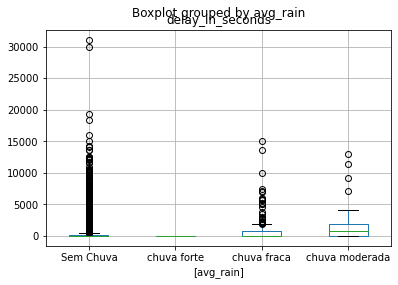

In [216]:
df.boxplot(['delay_in_seconds'], by=['avg_rain'])

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


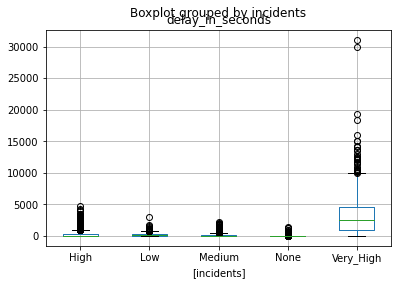

In [217]:
df.boxplot(['delay_in_seconds'], by=['incidents'])

In [218]:
df['record_date'] = pd.to_datetime(df['record_date'])

In [219]:
df['incidents'].value_counts()

None         2028
High         1073
Low           718
Very_High     603
Medium        578
Name: incidents, dtype: int64

In [220]:
df['incidents'].unique()

array(['None', 'Low', 'Very_High', 'High', 'Medium'], dtype=object)

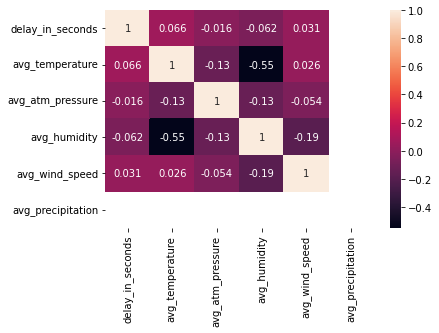

In [221]:
sns.heatmap(df.corr(), annot=True)

In [222]:
df[df['avg_rain']!= 'Sem Chuva']

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
15,Guimaraes,UNDEFINED,121,",",2021-01-20 10:00:00,LIGHT,11.0,1003.0,91.0,2.0,0.0,chuva moderada,Medium
25,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-04-25 07:00:00,LIGHT,13.0,1008.0,91.0,2.0,0.0,chuva fraca,High
89,Guimaraes,UNDEFINED,0,",",2021-01-23 08:00:00,LIGHT,9.0,1012.0,91.0,0.0,0.0,chuva moderada,None
152,Guimaraes,UNDEFINED,923,"N101,N101,N105,N101,N101,N105,N101,N101,",2021-04-21 15:00:00,LIGHT,13.0,1010.0,89.0,1.0,0.0,chuva moderada,Very_High
200,Guimaraes,UNDEFINED,915,"N101,N101,N101,N101,N101,N101,N101,",2021-06-18 15:00:00,LIGHT,16.0,1012.0,75.0,2.0,0.0,chuva fraca,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4901,Guimaraes,UNDEFINED,0,",",2021-01-24 21:00:00,DARK,10.0,1013.0,100.0,5.0,0.0,chuva fraca,None
4913,Guimaraes,UNDEFINED,0,",",2021-12-22 23:00:00,DARK,14.0,1014.0,81.0,2.0,0.0,chuva fraca,None
4934,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-15 18:00:00,LIGHT,27.0,1012.0,37.0,1.0,0.0,chuva fraca,High
4945,Guimaraes,UNDEFINED,0,",",2021-01-29 21:00:00,DARK,12.0,1016.0,92.0,0.0,0.0,chuva fraca,Medium


In [223]:
df[['avg_rain','avg_precipitation']][df['avg_rain'] == 'chuva forte']

,avg_rain,avg_precipitation
249,chuva forte,0.0
253,chuva forte,0.0
2731,chuva forte,0.0


In [224]:
df[['avg_rain','avg_precipitation']][df['avg_rain'] != 'Sem Chuva']

,avg_rain,avg_precipitation
15,chuva moderada,0.0
25,chuva fraca,0.0
89,chuva moderada,0.0
152,chuva moderada,0.0
200,chuva fraca,0.0
...,...,...
4901,chuva fraca,0.0
4913,chuva fraca,0.0
4934,chuva fraca,0.0
4945,chuva fraca,0.0


In [225]:
df['avg_rain'].unique()

array(['Sem Chuva', 'chuva moderada', 'chuva fraca', 'chuva forte'],
      dtype=object)

In [226]:
df['avg_rain'].value_counts()

Sem Chuva         4756
chuva fraca        214
chuva moderada      27
chuva forte          3
Name: avg_rain, dtype: int64

In [227]:
#df['avg_precipitation'] = ','

In [228]:
#df['city_name'] = ','

## Tratamento do atributo ***avg_precipitation***

In [229]:
df[df['avg_precipitation']!=0]

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents


### Estrategia 1

In [230]:
def returPreciption(dataInic,dataFim):
    latitude = 41.44
    longitude = -8.30
    link = f"https://archive-api.open-meteo.com/v1/era5?latitude={latitude}&longitude={longitude}&start_date={dataInic}&end_date={dataFim}&daily=precipitation_sum&timezone=Europe%2FLondon"
    
    request = requests.get(link)
    dic = request.json()
    return dic

### Estrategia 2

In [231]:
df.drop(labels=['avg_precipitation'], axis = 1, inplace=True)

## Tramento do atributo **affected_roads**



### Tratar valores nulos

In [232]:
df['affected_roads'].isnull().sum()

85

In [233]:
#df.dropna(subset = ['affected_roads'], inplace = True)
df.fillna('N101,'*100, inplace = True)

In [234]:
df.index = range(df.shape[0])

### Tratar atributo multivalorado

In [235]:
linha_com_erro = 'N101,IC5,N206,N101,N101,IC5,N101,N101' 

In [236]:
df.iloc[[678],[3]]

,affected_roads
678,"N101,N101"


In [237]:
df.iloc[[678],[3]] = linha_com_erro

In [238]:
df.iloc[[678],[3]]

,affected_roads
678,"N101,IC5,N206,N101,N101,IC5,N101,N101"


In [239]:
df.isnull().sum()

city_name             0
magnitude_of_delay    0
delay_in_seconds      0
affected_roads        0
record_date           0
luminosity            0
avg_temperature       0
avg_atm_pressure      0
avg_humidity          0
avg_wind_speed        0
avg_rain              0
incidents             0
dtype: int64

In [240]:
len(df[df['affected_roads'] == ',']['affected_roads'])

709

In [241]:
df['affected_roads'][df['affected_roads'] == ','] = '.'

<ipython-input-241-45218872e09d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['affected_roads'][df['affected_roads'] == ','] = '.'


In [242]:
#df['affected_roads'] = df['affected_roads'].astype(str)

In [243]:
#df['affected_roads'] = df['affected_roads'].str.split(',')

In [244]:
# N_affected_roads -> diz numero de acidentes numa ou mais via num record_data
#df['N_affected_roads'] = df['affected_roads'].apply(lambda x: len(x)-1 if(x[-1] == '') else ( 0 if(x[0] == '.') else len(x)))

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   city_name           5000 non-null   object        
 1   magnitude_of_delay  5000 non-null   object        
 2   delay_in_seconds    5000 non-null   int64         
 3   affected_roads      5000 non-null   object        
 4   record_date         5000 non-null   datetime64[ns]
 5   luminosity          5000 non-null   object        
 6   avg_temperature     5000 non-null   float64       
 7   avg_atm_pressure    5000 non-null   float64       
 8   avg_humidity        5000 non-null   float64       
 9   avg_wind_speed      5000 non-null   float64       
 10  avg_rain            5000 non-null   object        
 11  incidents           5000 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(6)
memory usage: 468.9+ KB


In [246]:
def affectedroadsTrans(data):
  data['affected_roads'] = data['affected_roads'].str.split(',')
  data['N_affected_roads'] = data['affected_roads'].apply(lambda x: len(x)-1 if(x[-1] == '') else ( 0 if(x[0] == '.') else len(x)))
  tdLista = [y for x in df['affected_roads'] for y in x]
  unic = pd.Series(tdLista).unique()
  for x in  list(unic):
    data[x] = data['affected_roads'].apply(lambda y: x in list(y))
def affectedroadsTransApagar(data):
  del data['affected_roads']
  del data['.']
  del data['']

In [247]:
affectedroadsTrans(df)


In [248]:
ver = ['affected_roads', 'N101', 'R206', 'N105',
       'N206', 'N309', 'IC5', 'N310', 'N207-4', 'EM579','N_affected_roads']
df[ver]

,affected_roads,N101,R206,N105,N206,N309,IC5,N310,N207-4,EM579,N_affected_roads
0,[.],False,False,False,False,False,False,False,False,False,0
1,"[N101, ]",True,False,False,False,False,False,False,False,False,1
2,[.],False,False,False,False,False,False,False,False,False,0
3,"[N101, R206, N105, N101, N101, N101, N101, N10...",True,True,True,False,False,False,False,False,False,11
4,"[N101, N101, N101, N101, N101, ]",True,False,False,False,False,False,False,False,False,5
...,...,...,...,...,...,...,...,...,...,...,...
4995,"[N101, N101, N101, N101, N101, ]",True,False,False,False,False,False,False,False,False,5
4996,"[N101, N101, N101, N101, N101]",True,False,False,False,False,False,False,False,False,5
4997,[.],False,False,False,False,False,False,False,False,False,0
4998,"[N101, N101, N101, N101, N101]",True,False,False,False,False,False,False,False,False,5


In [249]:
df[ver][df['N_affected_roads']>11]

,affected_roads,N101,R206,N105,N206,N309,IC5,N310,N207-4,EM579,N_affected_roads
9,"[N101, N101, N206, N105, N309, N309, N101, N10...",True,False,True,True,True,True,False,False,False,32
29,"[N101, N101, N101, N101, N101, N101, N101, N10...",True,False,False,False,False,False,False,False,False,100
38,"[N101, N101, N101, N101, N101, N101, N101, N10...",True,True,True,True,False,False,False,False,False,22
43,"[N101, N101, N206, R206, N206, N101, N105, N20...",True,True,True,True,True,False,False,False,False,36
76,"[N101, N101, N101, N101, N101, N101, N101, N10...",True,False,False,False,False,False,False,False,False,100
...,...,...,...,...,...,...,...,...,...,...,...
4910,"[N101, N101, N101, N101, N101, N101, N101, N10...",True,False,False,False,False,False,False,False,False,100
4923,"[N101, N101, N105, N105, N101, N101, N101, N10...",True,False,True,False,False,False,False,False,False,14
4926,"[N101, N309, N309, N101, R206, N105, N101, N10...",True,True,True,False,True,False,False,False,False,19
4965,"[N101, IC5, N101, N101, N101, N101, N101, IC5,...",True,False,False,False,False,True,False,False,False,13


In [250]:
df[ver].head()

,affected_roads,N101,R206,N105,N206,N309,IC5,N310,N207-4,EM579,N_affected_roads
0,[.],False,False,False,False,False,False,False,False,False,0
1,"[N101, ]",True,False,False,False,False,False,False,False,False,1
2,[.],False,False,False,False,False,False,False,False,False,0
3,"[N101, R206, N105, N101, N101, N101, N101, N10...",True,True,True,False,False,False,False,False,False,11
4,"[N101, N101, N101, N101, N101, ]",True,False,False,False,False,False,False,False,False,5


In [251]:
df.iloc[[37],[3]]

,affected_roads
37,"[N101, N101, N101, N101, N101, ]"


In [252]:
affectedroadsTransApagar(df)

In [253]:
df = df[['city_name', 'magnitude_of_delay', 'delay_in_seconds', 'N_affected_roads','record_date', 'N101', 'R206', 'N105',
       'N206', 'N309', 'IC5', 'N310', 'N207-4', 'EM579',
       'luminosity', 'avg_temperature', 'avg_atm_pressure', 'avg_humidity',
       'avg_wind_speed', 'avg_rain', 'incidents']]

In [254]:
df

,city_name,magnitude_of_delay,delay_in_seconds,N_affected_roads,record_date,N101,R206,N105,N206,N309,...,N310,N207-4,EM579,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,0,2021-03-15 23:00:00,False,False,False,False,False,...,False,False,False,DARK,12.0,1013.0,70.0,1.0,Sem Chuva,None
1,Guimaraes,UNDEFINED,385,1,2021-12-25 18:00:00,True,False,False,False,False,...,False,False,False,DARK,12.0,1007.0,91.0,1.0,Sem Chuva,None
2,Guimaraes,UNDEFINED,69,0,2021-03-12 15:00:00,False,False,False,False,False,...,False,False,False,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,Low
3,Guimaraes,MAJOR,2297,11,2021-09-29 09:00:00,True,True,True,False,False,...,False,False,False,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High
4,Guimaraes,UNDEFINED,0,5,2021-06-13 11:00:00,True,False,False,False,False,...,False,False,False,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Guimaraes,UNDEFINED,0,5,2021-04-13 00:00:00,True,False,False,False,False,...,False,False,False,DARK,13.0,1021.0,56.0,0.0,Sem Chuva,High
4996,Guimaraes,UNDEFINED,0,5,2021-07-06 14:00:00,True,False,False,False,False,...,False,False,False,LIGHT,19.0,1017.0,68.0,0.0,Sem Chuva,None
4997,Guimaraes,UNDEFINED,0,0,2021-03-18 03:00:00,False,False,False,False,False,...,False,False,False,DARK,13.0,1023.0,47.0,2.0,Sem Chuva,None
4998,Guimaraes,UNDEFINED,0,5,2021-11-02 06:00:00,True,False,False,False,False,...,False,False,False,DARK,12.0,1014.0,93.0,2.0,Sem Chuva,None


In [255]:
len(df.columns)

21

# Verificando Outliers

In [256]:
#df.iloc[[99],[16]] = 1018

In [257]:
numericos = ['delay_in_seconds', 'avg_temperature', 'avg_atm_pressure',	
 'avg_humidity',	'avg_wind_speed']

In [258]:
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [259]:
print(' '*6+'Outliers'+' '*6)
print()
for i in range(0, len(numericos)):
  print(numericos[i]+': '+str(len(find_outliers_IQR(df[numericos[i]]))))

      Outliers      

delay_in_seconds: 884
avg_temperature: 43
avg_atm_pressure: 45
avg_humidity: 9
avg_wind_speed: 44


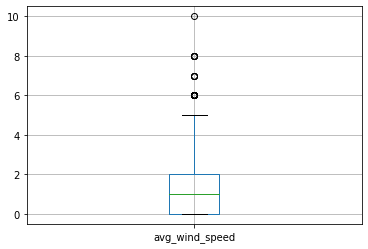

In [260]:
df.boxplot(['avg_wind_speed'])

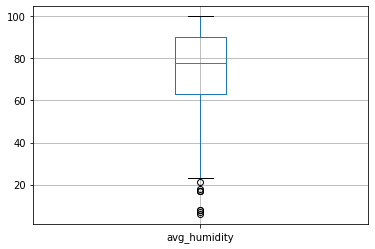

In [261]:
df.boxplot(['avg_humidity'])

In [262]:
# legitimo
v = df['avg_humidity']
q1 = df['avg_humidity'].quantile(.25)
q3 = df['avg_humidity'].quantile(.75)
il = q3-q1
l_lower = q1 - 1.5*il
l_up = q3 + 1.5*il
select = ((v>=l_lower)&(v<=l_up))
out = ((v<l_lower)|(v>l_up))
df['avg_humidity'][out] = df['avg_humidity'].median()

In [263]:
# legitimo
v = df['avg_temperature']
q1 = df['avg_temperature'].quantile(.25)
q3 = df['avg_temperature'].quantile(.75)
il = q3-q1
l_lower = q1 - 1.5*il
l_up = q3 + 1.5*il
select = ((v>=l_lower)&(v<=l_up))
out = ((v<l_lower)|(v>l_up))
min(df['avg_temperature'][out]), max(df['avg_temperature'][out])

(29.0, 35.0)

In [264]:
v = df['avg_wind_speed']
q1 = df['avg_wind_speed'].quantile(.25)
q3 = df['avg_wind_speed'].quantile(.75)
il = q3-q1
l_lower = q1 - 1.5*il
l_up = q3 + 1.5*il
select = ((v>=l_lower)&(v<=l_up))
out2 = ((v<l_lower)|(v>l_up))

In [265]:
df['avg_wind_speed'][out2] = df['avg_wind_speed'].median()

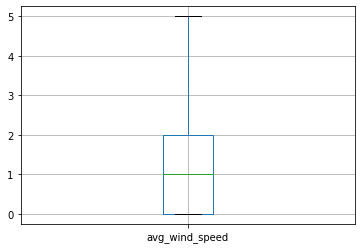

In [266]:
df.boxplot(['avg_wind_speed'])

In [267]:
df.index = range(df.shape[0])

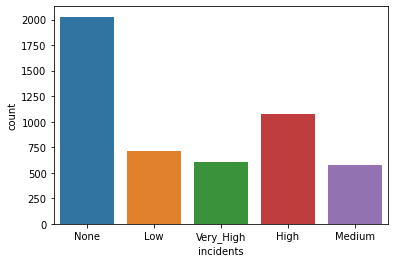

In [268]:
sns.countplot(x=df["incidents"])

# Pre-processamento

In [269]:
df['record_date'] = pd.to_numeric(pd.to_datetime(df['record_date']))

In [270]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [271]:
df.drop(['city_name'], axis = 1, inplace=True)

In [272]:
len(df.columns)

20

In [273]:
colum_name_magnitude_of_delay = df['magnitude_of_delay'].unique()

In [274]:
colum_name_magnitude_of_delay

array(['UNDEFINED', 'MAJOR', 'MODERATE'], dtype=object)

In [275]:
labelEncodeTarget = LabelEncoder()

In [276]:
X_data = df.iloc[:,:19]#.values

In [277]:
Y_data = df.iloc[:,-1].values
Y_data

array(['None', 'None', 'Low', ..., 'None', 'None', 'None'], dtype=object)

In [278]:
Y_data = labelEncodeTarget.fit_transform(Y_data)
Y_data.shape

(5000,)

In [279]:
df['incidents'] = labelEncodeTarget.fit_transform(df['incidents'])

In [280]:
df.columns

Index(['magnitude_of_delay', 'delay_in_seconds', 'N_affected_roads',
       'record_date', 'N101', 'R206', 'N105', 'N206', 'N309', 'IC5', 'N310',
       'N207-4', 'EM579', 'luminosity', 'avg_temperature', 'avg_atm_pressure',
       'avg_humidity', 'avg_wind_speed', 'avg_rain', 'incidents'],
      dtype='object')

## Label Encoder

Para executar esse não podemos executar o anterior, a ideia dese é transformar todos os valores categoricos do dataset em numericos.

### Mafnitude_of_delay

In [281]:
labelEncodeMD = LabelEncoder()
lb_magnitude_of_delay = labelEncodeMD.fit_transform(df['magnitude_of_delay'])
df['magnitude_of_delay'] = lb_magnitude_of_delay

### luminosity

In [282]:
lbEncluminosity = LabelEncoder()
lb_luminosity = lbEncluminosity.fit_transform(df['luminosity'])
df['luminosity'] = lb_luminosity

### avg_rain

In [283]:
labelEncodeAR = LabelEncoder()
lb_avg_rai = labelEncodeAR.fit_transform(df['avg_rain'])
df['avg_rain'] = lb_avg_rai

## Eliminando variaveis correlacionadas



,magnitude_of_delay,delay_in_seconds,N_affected_roads,record_date,N101,R206,N105,N206,N309,IC5,N310,N207-4,EM579,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
magnitude_of_delay,1.000000,-0.650416,-0.186641,-0.244500,-0.139799,-0.383762,-0.644224,-0.308955,-0.297531,-0.171274,-0.142810,-0.094301,-0.063152,-0.176318,-0.041404,-0.003510,0.058472,-0.031705,-0.056266,-0.135231
delay_in_seconds,-0.650416,1.000000,0.239507,0.158676,0.129384,0.499156,0.553396,0.467899,0.522493,0.268346,0.350377,0.249599,0.099315,0.123645,0.065532,-0.015805,-0.064092,0.025758,0.065801,0.256857
N_affected_roads,-0.186641,0.239507,1.000000,-0.037649,0.224450,0.125359,0.130668,0.123554,0.142022,0.072555,0.092595,0.058945,0.019453,0.100154,0.013849,0.012683,-0.049259,0.035467,0.010576,-0.023126
record_date,-0.244500,0.158676,-0.037649,1.000000,0.433038,0.081583,0.112588,0.075157,0.093292,0.052292,0.051545,0.029517,0.008967,-0.085021,0.014587,0.153609,0.048624,-0.082619,-0.069598,0.204474
N101,-0.139799,0.129384,0.224450,0.433038,1.000000,0.052747,0.143951,0.050328,0.056405,0.044214,0.023951,0.021582,0.015828,0.080349,0.318163,-0.006369,-0.143933,-0.041416,-0.100273,-0.120209
R206,-0.383762,0.499156,0.125359,0.081583,0.052747,1.000000,0.332198,0.292262,0.282674,0.121713,0.258152,0.149098,0.046650,0.089459,0.005107,-0.003983,-0.004448,0.035934,0.060559,0.133227
N105,-0.644224,0.553396,0.130668,0.112588,0.143951,0.332198,1.000000,0.284830,0.271791,0.119937,0.122681,0.069279,0.010812,0.216259,0.105905,-0.019036,-0.102722,0.036815,0.065356,0.105236
N206,-0.308955,0.467899,0.123554,0.075157,0.050328,0.292262,0.284830,1.000000,0.272166,0.195019,0.179457,0.096489,0.065294,0.040754,0.003961,0.019305,-0.022604,0.002401,0.014851,0.137829
N309,-0.297531,0.522493,0.142022,0.093292,0.056405,0.282674,0.271791,0.272166,1.000000,0.235632,0.244849,0.189078,-0.005349,0.030321,0.015916,0.009250,-0.009423,-0.001941,0.033550,0.139030
IC5,-0.171274,0.268346,0.072555,0.052292,0.044214,0.121713,0.119937,0.195019,0.235632,1.000000,0.078596,0.152037,-0.004714,0.033877,0.018592,-0.013822,-0.010211,0.008190,0.042316,0.042592


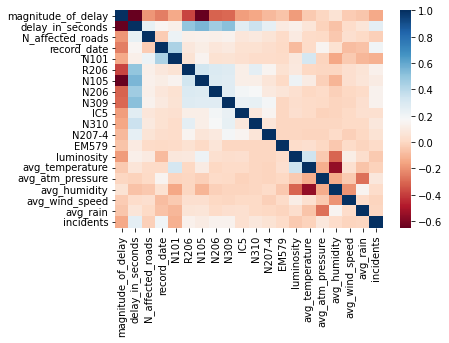

In [284]:
corr = df.corr()

display(corr)
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, cmap = 'RdBu')

In [285]:
df.columns

Index(['magnitude_of_delay', 'delay_in_seconds', 'N_affected_roads',
       'record_date', 'N101', 'R206', 'N105', 'N206', 'N309', 'IC5', 'N310',
       'N207-4', 'EM579', 'luminosity', 'avg_temperature', 'avg_atm_pressure',
       'avg_humidity', 'avg_wind_speed', 'avg_rain', 'incidents'],
      dtype='object')

## Selecionar melhores features

In [286]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

#### SelectKBest

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
len(df.iloc[:,:19].columns)

19

In [ ]:
best_val = SelectKBest(score_func=chi2, k =6)

In [ ]:
fit = best_val.fit(df.iloc[:,:19].values,df.iloc[:,-1].values)

In [ ]:
features = fit.fit_transform(df.iloc[:,:19].values, df.iloc[:,-1].values)

In [ ]:
print(features)

[[0 0 1615849200000000000 ... False False 70.0]
 [385 1 1640455200000000000 ... False False 91.0]
 [69 0 1615561200000000000 ... False False 64.0]
 ...
 [0 0 1616036400000000000 ... False False 47.0]
 [0 5 1635832800000000000 ... False False 93.0]
 [0 5 1639965600000000000 ... False False 77.0]]


In [ ]:
cols = fit.get_support(indices=True)
df.iloc[:,cols].columns

Index(['delay_in_seconds', 'N_affected_roads', 'record_date', 'R206', 'N105',
       'N206', 'N309'],
      dtype='object')

#### RFE

In [287]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 

In [288]:
parametros_RF = {'n_estimators':[10,20,100],'max_features':[0.5,1.0],'criterion' : ['gini','entropy'],'max_depth': [None,100,200]}

In [289]:
griSearchRF = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros_RF,cv=10)

In [290]:
griSearchRF.fit(df.iloc[:,:19].values,df.iloc[:,-1].values)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 100, 200],
                         'max_features': [0.5, 1.0],
                         'n_estimators': [10, 20, 100]})

In [291]:
griSearchRF.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 1.0,
 'n_estimators': 100}

In [ ]:
RFEmodel = RandomForestClassifier(criterion='entropy'
                                  , max_depth=None
                                  , max_features=1.0
                                  ,n_estimators=100)

In [ ]:
from sklearn.feature_selection import RFECV

In [ ]:
#rfe = RFE(RFEmodel, n_features_to_select=5, step=100)
rfe = RFECV(RFEmodel, step=10, cv=10)

In [ ]:
lb = LabelEncoder()

In [ ]:
df.columns

Index(['magnitude_of_delay', 'delay_in_seconds', 'N_affected_roads',
       'record_date', 'N101', 'R206', 'N105', 'N206', 'N309', 'IC5', 'N310',
       'N207-4', 'EM579', 'luminosity', 'avg_temperature', 'avg_atm_pressure',
       'avg_humidity', 'avg_wind_speed', 'avg_rain', 'incidents'],
      dtype='object')

In [ ]:
RfeFit = rfe.fit(df.iloc[:,:19].values,df.iloc[:,-1].values)

In [ ]:
rfe.estimator_.feature_importances_

array([4.74143734e-03, 3.13693267e-01, 1.50426789e-01, 4.82984495e-01,
       1.00104269e-03, 8.07467718e-04, 1.42704945e-03, 1.57000816e-04,
       2.92243670e-04, 6.91465314e-04, 0.00000000e+00, 6.00674651e-05,
       5.50032907e-05, 2.35063621e-03, 9.24102287e-03, 1.37276212e-02,
       1.35246326e-02, 4.22115190e-03, 5.97605842e-04])

Text(0.5, 1.0, 'Importância de cada feature')

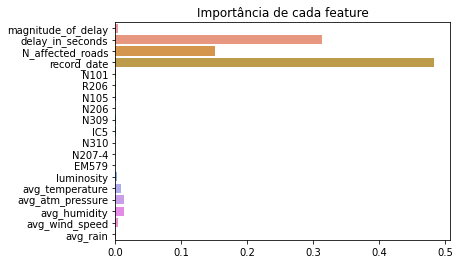

In [ ]:
importances = pd.Series(data=rfe.estimator_.feature_importances_, index=df.iloc[:,:19].columns)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

## Eliminando features

In [95]:
X_data.drop(['avg_rain', 'magnitude_of_delay'], axis = 1, inplace=True)

In [96]:
X_data['luminosity'] = df['luminosity']

In [97]:
X_data['luminosity'].unique()

array([0, 1, 2])

In [98]:
X_data.drop(['avg_wind_speed'], axis = 1, inplace=True)

In [99]:
X_data.drop(['N206', 'IC5', 'N310',
       'N207-4', 'EM579'], axis=1, inplace = True)

In [100]:
X_data.drop(['N101'], axis=1, inplace = True)

In [101]:
median =  X_data['N_affected_roads'][X_data['N_affected_roads']<100].median()

In [102]:
X_data['N_affected_roads'][X_data['N_affected_roads']==100] = median

<ipython-input-102-3f7a81ce780e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_data['N_affected_roads'][X_data['N_affected_roads']==100] = median


In [147]:
X_data.drop(labels=['avg_temperature'], axis = 1, inplace = True)

## OneHot Encoder

Faz o OneHot Encoder nos atributos categoricos que foram transformados em numericos no LabelEncoder

In [104]:
oneHotEncode = OneHotEncoder()
#labelEncode = LabelEncoder()

#### Onehot encoder no atributo luminosity

In [105]:
#oneHotluminosity = OneHotEncoder()
oneHotEncode = OneHotEncoder()

In [106]:
lbEncluminosity.classes_

array(['DARK', 'LIGHT', 'LOW_LIGHT'], dtype=object)

In [107]:
onHot_luminosity = oneHotEncode.fit_transform(df[['luminosity']]).toarray()
lb_lb_luminosity = pd.DataFrame(onHot_luminosity, columns=list(lbEncluminosity.classes_))
lb_lb_luminosity

,DARK,LIGHT,LOW_LIGHT
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
4995,1.0,0.0,0.0
4996,0.0,1.0,0.0
4997,1.0,0.0,0.0
4998,1.0,0.0,0.0


In [108]:
X_data.drop(['luminosity'], axis = 1, inplace=True)

In [109]:
X_data = pd.concat([X_data,lb_lb_luminosity], axis = 1)

In [110]:
X_data

,delay_in_seconds,N_affected_roads,record_date,R206,N105,N309,avg_temperature,avg_atm_pressure,avg_humidity,DARK,LIGHT,LOW_LIGHT
0,0,0,1615849200000000000,False,False,False,12.0,1013.0,70.0,1.0,0.0,0.0
1,385,1,1640455200000000000,False,False,False,12.0,1007.0,91.0,1.0,0.0,0.0
2,69,0,1615561200000000000,False,False,False,14.0,1025.0,64.0,0.0,1.0,0.0
3,2297,11,1632906000000000000,True,True,False,15.0,1028.0,75.0,0.0,1.0,0.0
4,0,5,1623582000000000000,False,False,False,27.0,1020.0,52.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,5,1618272000000000000,False,False,False,13.0,1021.0,56.0,1.0,0.0,0.0
4996,0,5,1625580000000000000,False,False,False,19.0,1017.0,68.0,0.0,1.0,0.0
4997,0,0,1616036400000000000,False,False,False,13.0,1023.0,47.0,1.0,0.0,0.0
4998,0,5,1635832800000000000,False,False,False,12.0,1014.0,93.0,1.0,0.0,0.0


## Divisao Treino Teste Normalizados

In [148]:
CX_data = X_data.copy()
X_dataN = X_data.copy()

In [149]:
from sklearn.model_selection import train_test_split

In [150]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

In [151]:
X_dataN = RobustScaler().fit_transform(X_dataN)

In [152]:
X_data_trainN, X_data_testN, y_data_trainN, y_data_testN = train_test_split(X_dataN, Y_data, test_size = 0.10, random_state = 0)

## Divisao Treino e Teste

In [153]:
Y_data

array([3, 3, 1, ..., 3, 3, 3])

In [154]:
X_data

,delay_in_seconds,N_affected_roads,record_date,R206,N105,N309,avg_atm_pressure,avg_humidity,DARK,LIGHT,LOW_LIGHT
0,0,0,1615849200000000000,False,False,False,1013.0,70.0,1.0,0.0,0.0
1,385,1,1640455200000000000,False,False,False,1007.0,91.0,1.0,0.0,0.0
2,69,0,1615561200000000000,False,False,False,1025.0,64.0,0.0,1.0,0.0
3,2297,11,1632906000000000000,True,True,False,1028.0,75.0,0.0,1.0,0.0
4,0,5,1623582000000000000,False,False,False,1020.0,52.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4995,0,5,1618272000000000000,False,False,False,1021.0,56.0,1.0,0.0,0.0
4996,0,5,1625580000000000000,False,False,False,1017.0,68.0,0.0,1.0,0.0
4997,0,0,1616036400000000000,False,False,False,1023.0,47.0,1.0,0.0,0.0
4998,0,5,1635832800000000000,False,False,False,1014.0,93.0,1.0,0.0,0.0


In [155]:
X_data_train, X_data_test, y_data_train, y_data_test = train_test_split(X_data.values, Y_data, test_size = 0.10, random_state = 0)

In [156]:
# with open('TrainTestEstrategia3SemNormalizacao.pkl', mode = 'wb') as f:
#   pickle.dump([X_data_train, X_data_test, y_data_train, y_data_test], f)

In [157]:
X_data_train.shape,y_data_train.shape

((4500, 11), (4500,))

In [158]:
X_data_test.shape,y_data_test.shape

((500, 11), (500,))

# Modelo

In [132]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

In [128]:
tuned_parameters = [[{'n_estimators':[10,20,100],'max_features':[0.5,1.0],'criterion' : ['gini','entropy'],'max_depth': [None,100,200]}],
                    [{'penalty': ['l1','l2'], 'tol' : [1e-4,1e-5], 'max_iter' : [10,100,1000], 'fit_intercept' : [True, False]}],
                    [{'max_depth' : [10,100,1000,10000], 'min_samples_split' : [2,10,100], 'min_samples_leaf': [1,5,10], 'max_features' : ["sqrt","log2"]}],
                    [{'n_neighbors' : [5,10,20],'weights': ['uniform','distance'], 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],'p' : [1,2,3]}],
                    [{'n_estimators':[10,20,100],'max_samples':[0.5,1.0],'max_features':[0.5,1.0],'random_state':[None]}],        
                    ]
algorithms = [
              RandomForestClassifier(),
              LogisticRegression(),
              DecisionTreeClassifier(),
              KNeighborsClassifier(),
              BaggingClassifier(),
              ]
algorithm_names = [
                   "RandomForestClassifier",
                   "LogisticRegression",
                   "DecisionTreeClassifier",
                   "KNeighborsClassifier",
                   "BaggingClassifier",
                   ]


In [129]:
def crossValidation(p_x_train,p_x_test,p_y_train,p_y_test):
  for i in range(0, len(algorithm_names)):
      print('#'*18+' '+algorithm_names[i]+' '+'#'*18)
      print()
      scores = ['accuracy']

      for score in scores:
          print("# Tuning hyper-parameters for:", score)
          print()

          clf = GridSearchCV(algorithms[i], tuned_parameters[i], cv=10,
                            scoring='%s' % score)
          clf.fit(p_x_train, p_y_train)

          print("Best parameters set found on development set:")
          print()
          print(clf.best_params_)
          print()

          print("Detailed classification report:")
          print()
          print()
          y_true, y_pred = p_y_test, clf.predict(p_x_test)
          print(classification_report(y_true, y_pred))
          print("Detailed confusion matrix:")
          print(confusion_matrix(y_true, y_pred))
          print("Precision Score: \n")
          print(precision_score(y_true, y_pred,average='micro'))

          print()

## Validacao cruzada

In [130]:
crossValidation(X_data_train, X_data_test, y_data_train, y_data_test)

################## RandomForestClassifier ##################

# Tuning hyper-parameters for: precision_macro

Best parameters set found on development set:

{'criterion': 'entropy', 'max_depth': 100, 'max_features': 1.0, 'n_estimators': 100}

Detailed classification report:


              precision    recall  f1-score   support

           0       0.92      0.89      0.90       115
           1       0.90      0.89      0.90        72
           2       0.82      0.90      0.86        50
           3       1.00      1.00      1.00       206
           4       0.88      0.89      0.89        57

    accuracy                           0.93       500
   macro avg       0.90      0.91      0.91       500
weighted avg       0.94      0.93      0.93       500

Detailed confusion matrix:
[[102   2   4   0   7]
 [  2  64   6   0   0]
 [  1   4  45   0   0]
 [  0   1   0 205   0]
 [  6   0   0   0  51]]
Precision Score: 

0.934

# Tuning hyper-parameters for: recall_macro

Best parameters set 

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Pr

Best parameters set found on development set:

{'fit_intercept': True, 'max_iter': 10, 'penalty': 'l2', 'tol': 0.0001}

Detailed classification report:


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       115
           1       0.00      0.00      0.00        72
           2       0.00      0.00      0.00        50
           3       0.41      1.00      0.58       206
           4       0.00      0.00      0.00        57

    accuracy                           0.41       500
   macro avg       0.08      0.20      0.12       500
weighted avg       0.17      0.41      0.24       500

Detailed confusion matrix:
[[  0   0   0 115   0]
 [  0   0   0  72   0]
 [  0   0   0  50   0]
 [  0   0   0 206   0]
 [  0   0   0  57   0]]
Precision Score: 

0.412

# Tuning hyper-parameters for: recall_macro



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_val

Best parameters set found on development set:

{'fit_intercept': True, 'max_iter': 10, 'penalty': 'l2', 'tol': 0.0001}

Detailed classification report:


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       115
           1       0.00      0.00      0.00        72
           2       0.00      0.00      0.00        50
           3       0.41      1.00      0.58       206
           4       0.00      0.00      0.00        57

    accuracy                           0.41       500
   macro avg       0.08      0.20      0.12       500
weighted avg       0.17      0.41      0.24       500

Detailed confusion matrix:
[[  0   0   0 115   0]
 [  0   0   0  72   0]
 [  0   0   0  50   0]
 [  0   0   0 206   0]
 [  0   0   0  57   0]]
Precision Score: 

0.412

# Tuning hyper-parameters for: accuracy



/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solve

Best parameters set found on development set:

{'fit_intercept': True, 'max_iter': 10, 'penalty': 'l2', 'tol': 0.0001}

Detailed classification report:


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       115
           1       0.00      0.00      0.00        72
           2       0.00      0.00      0.00        50
           3       0.41      1.00      0.58       206
           4       0.00      0.00      0.00        57

    accuracy                           0.41       500
   macro avg       0.08      0.20      0.12       500
weighted avg       0.17      0.41      0.24       500

Detailed confusion matrix:
[[  0   0   0 115   0]
 [  0   0   0  72   0]
 [  0   0   0  50   0]
 [  0   0   0 206   0]
 [  0   0   0  57   0]]
Precision Score: 

0.412

################## DecisionTreeClassifier ##################

# Tuning hyper-parameters for: precision_macro

Best parameters set found on development set:

{'max_depth': 10000, 'max_featu

## Validacao cruzada com Dados Normalizados

In [ ]:
crossValidation(X_data_trainN, X_data_testN, y_data_trainN, y_data_testN)

################## LogisticRegression ##################

# Tuning hyper-parameters for: precision_macro



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Best parameters set found on development set:

{'fit_intercept': True, 'max_iter': 1000, 'penalty': 'l2', 'tol': 0.0001}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.50      0.72      0.59        94
           1       0.64      0.38      0.47        72
           2       0.50      0.06      0.11        64
           3       0.80      0.97      0.88       207
           4       0.83      0.82      0.83        55

    accuracy                           0.70       492
   macro avg       0.65      0.59      0.58       492
weighted avg       0.68      0.70      0.66       492

Detailed confusion matrix:
[[ 68   4   1  12   9]
 [ 17  27   2  26   0]
 [ 41   6   4  13   0]
 [  0   5   1 201   0]
 [ 10   0   0   0  45]]
Precision Score: 

0.7012195121951219

################## DecisionTreeClassifier ##################

# Tuning 

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best parameters set found on development set:

{'max_depth': 100, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.72      0.78      0.74        94
           1       0.87      0.83      0.85        72
           2       0.82      0.77      0.79        64
           3       1.00      0.99      0.99       207
           4       0.73      0.75      0.74        55

    accuracy                           0.87       492
   macro avg       0.83      0.82      0.82       492
weighted avg       0.87      0.87      0.87       492

Detailed confusion matrix:
[[ 73   2   5   0  14]
 [  7  60   4   1   0]
 [ 10   4  49   0   1]
 [  0   3   0 204   0]
 [ 12   0   2   0  41]]
Precision Score: 

0.8678861788617886

################## KNeighborsClassifier ###############

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best parameters set found on development set:

{'algorithm': 'SAMME', 'learning_rate': 0.8, 'n_estimators': 200, 'random_state': None}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.58      0.93      0.71        94
           1       0.68      0.65      0.67        72
           2       0.77      0.42      0.55        64
           3       0.88      0.93      0.90       207
           4       0.89      0.31      0.46        55

    accuracy                           0.75       492
   macro avg       0.76      0.65      0.66       492
weighted avg       0.78      0.75      0.74       492

Detailed confusion matrix:
[[ 87   2   2   1   2]
 [  2  47   6  17   0]
 [ 24   5  27   8   0]
 [  0  15   0 192   0]
 [ 38   0   0   0  17]]
Precision Score: 

0.7520325203252033



## Modelo escolhido

In [159]:
estimator = RandomForestClassifier(criterion='entropy'
                                  , max_depth=None
                                  , max_features=1.0
                                  ,n_estimators=100)

In [160]:
classifier = estimator

In [164]:
classifier.fit(X_data_train, y_data_train)

RandomForestClassifier(criterion='entropy', max_features=1.0)

In [165]:
predictionsTest = classifier.predict(X_data_test)

In [166]:
print(classification_report(y_data_test, predictionsTest))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       115
           1       0.91      0.88      0.89        72
           2       0.80      0.90      0.85        50
           3       1.00      1.00      1.00       206
           4       0.90      0.91      0.90        57

    accuracy                           0.94       500
   macro avg       0.91      0.92      0.91       500
weighted avg       0.94      0.94      0.94       500



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


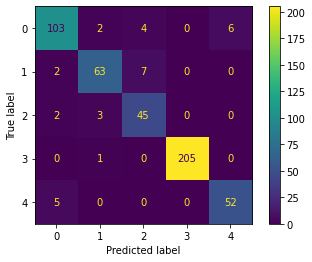

In [167]:
plot_confusion_matrix(classifier, X_data_test, y_data_test)

## Preparar o Dataset De Teste para submissao

In [168]:
def transform(data):
  data.drop(labels=['avg_precipitation'], axis = 1, inplace=True)
  data.fillna({'affected_roads': ','}, inplace = True)
  data['affected_roads'][data['affected_roads'] == ','] = '.'
  #affectedroadsTrans(data)
  #affectedroadsTransApagar(data)
  data.drop(['city_name'], axis = 1, inplace=True)

In [169]:
df_test = pd.read_csv('/content/DataSetDAA/test_data.csv')
transform(df_test)

<ipython-input-168-5972a7e5d553>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['affected_roads'][data['affected_roads'] == ','] = '.'


In [170]:
df_test['record_date'] = pd.to_numeric(pd.to_datetime(df_test['record_date']))

In [172]:
df_test['affected_roads'] = df_test['affected_roads'].str.split(',')
df_test['N_affected_roads'] = df_test['affected_roads'].apply(lambda x: len(x)-1 if(x[-1] == '') else ( 0 if(x[0] == '.') else len(x)))
tdLista = [y for x in df_test['affected_roads'] for y in x]
unic = pd.Series(tdLista).unique()
for x in  list(unic):
    df_test[x] = df_test['affected_roads'].apply(lambda y: x in list(y))

In [173]:
df_test.drop('N101 - N310', axis = 1, inplace=True)

In [174]:
affectedroadsTransApagar(df_test)

In [175]:
df_test.drop(['avg_rain', 'magnitude_of_delay', 'avg_wind_speed'], axis = 1, inplace=True)

In [176]:
df_test.drop(['N206', 'IC5', 'N310',
       'N207-4', 'EM579'], axis=1, inplace = True)

In [177]:
df_test.drop(['N101'], axis=1, inplace = True)

In [178]:
lbluminosity = LabelEncoder()
lb_luminosity = lbluminosity.fit_transform(df_test['luminosity'])
df_test['luminosity'] = lb_luminosity

In [179]:
onHot = oneHotEncode.fit_transform(df_test[['luminosity']]).toarray()
lbluminosity = pd.DataFrame(onHot, columns=list(lbluminosity.classes_))

In [180]:
df_test['luminosity'].unique()

array([1, 0, 2])

In [181]:
df_test.drop(['luminosity'],axis=1, inplace=True)

In [182]:
df_test = pd.concat([df_test,lbluminosity], axis = 1)

In [ ]:
#X_data.columns

In [183]:
df_test = df_test[['delay_in_seconds', 'N_affected_roads', 'record_date', 'R206', 'N105',
       'N309', 'avg_atm_pressure', 'avg_humidity', 'DARK',
       'LIGHT', 'LOW_LIGHT']]

In [ ]:
# df_test = df_test[['delay_in_seconds', 'N_affected_roads', 'record_date', 'R206', 'N105',
#        'N309', 'avg_temperature', 'avg_atm_pressure', 'avg_humidity', 'DARK',
#        'LIGHT', 'LOW_LIGHT']]

In [184]:
df_test

,delay_in_seconds,N_affected_roads,record_date,R206,N105,N309,avg_atm_pressure,avg_humidity,DARK,LIGHT,LOW_LIGHT
0,1211,6,1618340400000000000,False,False,False,1018.0,80.0,0.0,1.0,0.0
1,0,5,1634097600000000000,False,False,False,1018.0,41.0,1.0,0.0,0.0
2,0,5,1626634800000000000,False,False,False,1017.0,71.0,0.0,1.0,0.0
3,140,6,1635606000000000000,True,False,False,1008.0,81.0,0.0,1.0,0.0
4,0,5,1634551200000000000,False,False,False,1022.0,86.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1201,0,1,1640944800000000000,False,False,False,1025.0,70.0,0.0,1.0,0.0
1202,44,5,1626393600000000000,False,False,False,1016.0,39.0,1.0,0.0,0.0
1203,1261,7,1639926000000000000,False,False,False,1018.0,60.0,0.0,1.0,0.0
1204,246,0,1615222800000000000,False,False,False,1015.0,50.0,0.0,1.0,0.0


### Normalizar os Dados

In [ ]:
# df_test[['delay_in_seconds', 'N_affected_roads', 'record_date', 'avg_temperature', 'avg_atm_pressure',
#        'avg_humidity']] = MinMaxScaler().fit_transform(
#            df_test[['delay_in_seconds', 'N_affected_roads', 'record_date', 'avg_temperature', 'avg_atm_pressure',
#        'avg_humidity']]
#        )

In [ ]:
# df_test = MinMaxScaler().fit_transform(df_test)

In [ ]:
# df_test = RobustScaler().fit_transform(df_test)

In [ ]:
# df_test

### Modelo

In [185]:
predictions = classifier.predict(df_test.values)

In [ ]:
# predictions = classifier.predict(df_test)

# Saida Para submeter no kaggle

In [186]:
labelEncodeTarget.classes_

array(['High', 'Low', 'Medium', 'None', 'Very_High'], dtype=object)

In [187]:
lbSubm = labelEncodeTarget.inverse_transform(predictions)

In [188]:
len(lbSubm)

1206

In [189]:
df_sub = pd.DataFrame({'RowId':[x for x in range(1,1207)],'Incidents':lbSubm})

In [190]:
df_sub

,RowId,Incidents
0,1,Very_High
1,2,None
2,3,None
3,4,Low
4,5,None
...,...,...
1201,1202,None
1202,1203,Low
1203,1204,Medium
1204,1205,Low


In [191]:
df_sub.to_csv('/content/submissionV13.csv', index=False)

In [192]:
# sub = pd.read_csv('/content/DataSetDAA/example_submission.csv')
# sub